In [2]:
from google.colab import drive
import os
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/My Drive/Colab Notebooks/dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
/gdrive/My Drive/Colab Notebooks/dataset


In [0]:
x=pd.read_csv('logistic_x.txt',sep='\ +',header=None,engine='python')
y=pd.read_csv('logistic_y.txt',sep='\ +',header=None,engine='python')
y=y.astype(int)
x['label']=y[0].values

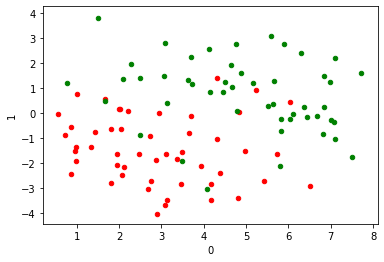

In [4]:
ax=plt.axes()
x.query('label==-1').plot.scatter(x=0,y=1,ax=ax,color='red')
x.query('label==1').plot.scatter(x=0,y=1,ax=ax,color='green')

In [0]:
xs=x[[0,1]].values
xs=np.hstack([np.ones([xs.shape[0],1]),xs])
ys=x['label'].values
ys=np.clip(ys,0,1)

In [6]:
lr=0.1
thetas=[]
theta=np.ones(xs.shape[1])
loss=1e9
iteration=0
while loss>1e-6:
    old_theta=theta.copy()
    for j in range(xs.shape[1]):
        for i in range(xs.shape[0]):
            fexp=1+np.exp(-theta.dot(xs[i,:].T))
            delta=lr*((ys[i])-(1/fexp))*xs[i,j]
            theta[j]+=delta
    if(iteration%100==0):
        thetas.append(theta.copy())
    iteration+=1
    loss=np.sum(np.abs(theta-old_theta))
thetas.append(theta.copy())
print('Converge after',iteration, 'iterations')

Converge after 1184 iterations


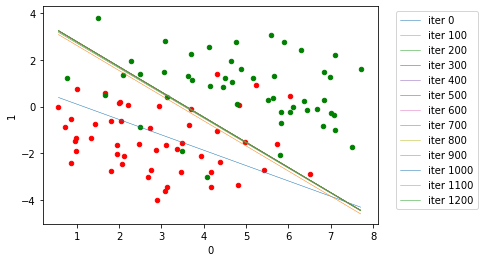

In [7]:
ax=plt.axes()
x.query('label == -1').plot.scatter(x=0,y=1, ax=ax, color='red')
x.query('label == 1').plot.scatter(x=0,y=1, ax=ax, color='green')
_xs = np.array([np.min(xs[:,1]), np.max(xs[:,1])])
for k, theta in enumerate(thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(100*k), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
